In [15]:
# general packages
import pandas as pd
import numpy as np

# specialized stats packages
from lifelines import KaplanMeierFitter

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# preferences
%matplotlib inline

In [6]:
# data
from lifelines.datasets import load_psychiatric_patients

df = load_psychiatric_patients()

In [7]:
df.head()

,Age,T,C,sex
0,51,1,1,2
1,58,1,1,2
2,55,2,1,2
3,28,22,1,2
4,21,30,0,1


In [8]:
df.describe()

,Age,T,C,sex
count,26.000000,26.000000,26.000000,26.000000
mean,35.153846,26.423077,0.538462,1.576923
std,10.479284,11.559146,0.508391,0.503831
min,19.000000,1.000000,0.000000,1.000000
25%,28.250000,22.500000,0.000000,1.000000
50%,32.500000,30.500000,1.000000,2.000000
75%,42.500000,34.750000,1.000000,2.000000
max,58.000000,40.000000,1.000000,2.000000


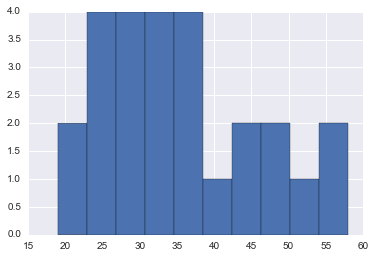

In [13]:
plt.hist(df.Age);

In [ ]:
# TO DO: add split plots for sex and age from Seaborn

## Kaplan-Meier curve

In [17]:
kmf = KaplanMeierFitter()
T = df["T"] #duration
C = df["C"] 

In [20]:
kmf.fit(T,C);

AttributeError: '_process_plot_var_args' object has no attribute 'get_next_color'

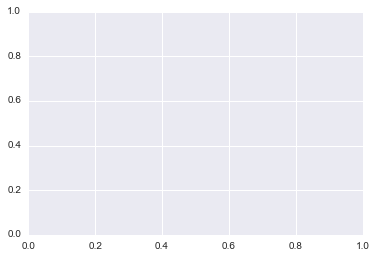

In [22]:
kmf.survival_function_
kmf.median_
kmf.plot()

In [25]:
plt.__version__

AttributeError: 'module' object has no attribute '__version__'